In [465]:
import os
import numpy as np
import matplotlib as mpl
import cv2 as cv
import pandas as pd
from skimage import measure as meas, segmentation as seg, color as col, \
                    filters as filt, morphology as morph, feature as feat
from matplotlib import pyplot as plt, patches as patch
from tqdm import tnrange, tqdm_notebook as tqdm
from jupyterthemes import jtplot

In [60]:
jtplot.reset()
# mpl.use('nbAgg')
plt.style.use("seaborn")
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

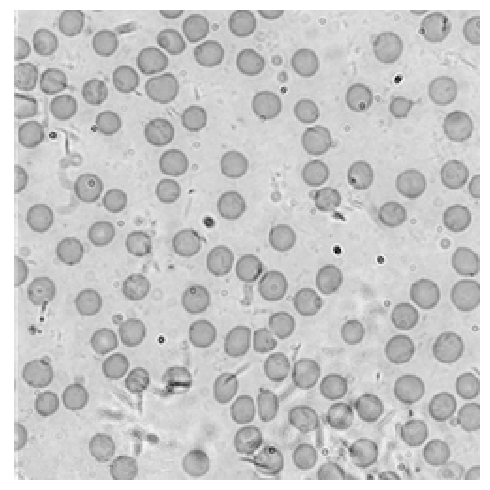

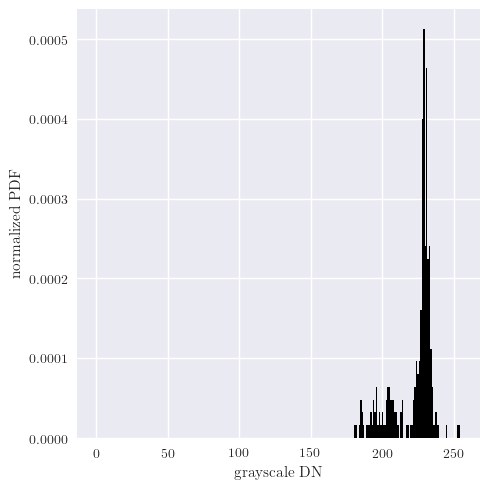

In [454]:
A = cv.imread('3468.png', 0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(A, 'gray')
ax.grid(0)
ax.axis('off')
plt.tight_layout()
# plt.savefig('cell_gray.png', bbox_inches='tight', dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
hist = np.squeeze(cv.calcHist(A, [0], None, [256], [0, 255]))/A.size
ax.bar(range(256), hist, width=1.0, color='k')
ax.set_xlabel('grayscale DN')
ax.set_ylabel('normalized PDF')
plt.tight_layout()
# plt.savefig('gray_hist.png', bbox_inches='tight', dpi=300)
plt.show()

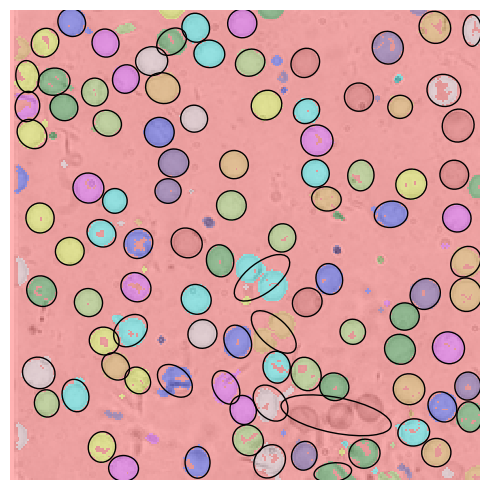

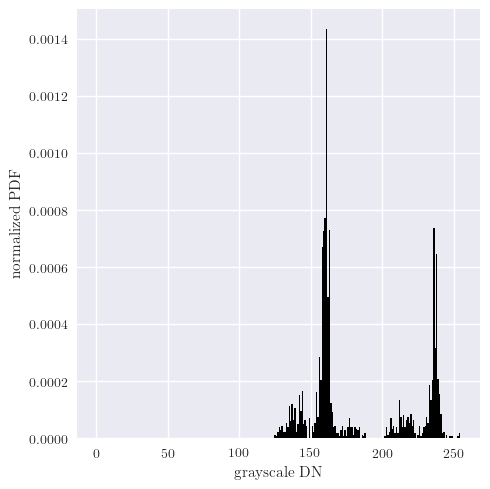

In [462]:
fig = plt.figure()
ax = fig.add_subplot(111)
Ab = cv.GaussianBlur(A, (1, 1), 0)
thresh, Ab = cv.threshold(A, 127, 255, cv.THRESH_OTSU)
Ab = (Ab < thresh).astype('uint8') * 255
Ab = cv.morphologyEx(Ab, cv.MORPH_OPEN, 
                     cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3)))
# Ab = cv.morphologyEx(Ab, cv.MORPH_CLOSE, 
#                      cv.getStructuringElement(cv.MORPH_ELLIPSE, (1, 1)))
Al = meas.label(Ab, neighbors=4)
for region in meas.regionprops(Al):
    if region.area > 100:
        y, x = region.centroid
        maja, mina = region.major_axis_length, region.minor_axis_length
        th = np.degrees(region.orientation)
        circ = patch.Ellipse((x, y), maja, mina, th,
                             fill=False, ec='k', lw=1)
        ax.add_patch(circ)
Ao = col.label2rgb(Al, image=A)
Ao = (Ao * 255).astype('uint8')
ax.imshow(Ao)
ax.axis('off')
plt.tight_layout()
# plt.savefig('cell_blobs.png', bbox_inches='tight', dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
hist = np.zeros(256)
for i in range(3):
    hist += np.squeeze(cv.calcHist(Ao, [i], None, [256], [0, 255]))/Ao.size
ax.bar(range(256), hist, width=1.0, color='k')
ax.set_xlabel('grayscale DN')
ax.set_ylabel('normalized PDF')
plt.tight_layout()
# plt.savefig('blobs_hist.png', dpi=300, bbox_inches='tight')
plt.show()

In [443]:
props = meas.regionprops(Al)
num_props = len(props)
prop_names = pd.Series(props[0])
prop_vals = np.zeros((len(prop_names), num_props), object)
for i in range(len(prop_names)):
    for j in range(num_props):
        prop_vals[i,j] = props[j][prop_names[i]]
props_df = pd.DataFrame(data=prop_vals.T, columns=prop_names)
props_df

,area,bbox,bbox_area,centroid,convex_area,convex_image,coords,eccentricity,equivalent_diameter,euler_number,...,major_axis_length,minor_axis_length,moments,moments_central,moments_hu,moments_normalized,orientation,perimeter,slice,solidity
0,169,"(0, 26, 14, 40)",196,"(6.1420118343195265, 32.337278106508876)",172,"[[False, False, True, True, True, True, True, ...","[[0, 28], [0, 29], [0, 30], [0, 31], [0, 32], ...",0.375205,14.6689,0,...,15.3653,14.2427,"[[169.0, 1038.0, 8716.0, 82962.0], [1071.0, 64...","[[169.0, 3.6415315207705135e-14, 2340.59171597...","[0.16233209145006566, 0.00015108459744631397, ...","[[nan, nan, 0.08195062203621481, 0.00182158245...",0.849403,51.2132,"(slice(0, 14, None), slice(26, 40, None))",0.982558
1,50,"(0, 79, 5, 93)",70,"(1.6, 85.5)",50,"[[True, True, True, True, True, True, True, Tr...","[[0, 79], [0, 80], [0, 81], [0, 82], [0, 83], ...",0.905808,7.97885,1,...,12.8062,5.42586,"[[50.0, 80.0, 220.0, 692.0], [325.0, 520.0, 14...","[[50.0, -4.440892098500626e-15, 92.0, 45.59999...","[0.2418, 0.028291239999999995, 0.0031591710720...","[[nan, nan, 0.0368, 0.0025795255377685238], [n...",-4.75244e-18,29.3137,"(slice(0, 5, None), slice(79, 93, None))",1
2,186,"(0, 116, 15, 131)",225,"(6.639784946236559, 123.03763440860214)",190,"[[False, False, False, True, True, True, True,...","[[0, 119], [0, 120], [0, 121], [0, 122], [0, 1...",0.188515,15.389,1,...,15.5325,15.254,"[[186.0, 1235.0, 10911.0, 108617.0], [1309.0, ...","[[186.0, -2.6645352591003757e-15, 2710.8655913...","[0.15925546741061494, 8.30018476304013e-06, 2....","[[nan, nan, 0.07835777521672592, 0.00036279723...",-0.245769,47.799,"(slice(0, 15, None), slice(116, 131, None))",0.978947
3,54,"(0, 132, 5, 146)",70,"(1.6666666666666667, 138.12962962962962)",54,"[[True, True, True, True, True, True, True, Tr...","[[0, 132], [0, 133], [0, 134], [0, 135], [0, 1...",0.914658,8.29186,1,...,13.4479,5.43605,"[[54.0, 90.0, 250.0, 792.0], [331.0, 540.0, 15...","[[54.0, -5.10702591327572e-15, 100.0, 41.99999...","[0.24351597825534727, 0.030664139747201138, 0....","[[nan, nan, 0.03429355281207133, 0.00196003980...",0.0228557,29.8995,"(slice(0, 5, None), slice(132, 146, None))",1
4,19,"(0, 213, 3, 222)",27,"(0.6842105263157895, 217.0)",19,"[[True, True, True, True, True, True, True, Tr...","[[0, 213], [0, 214], [0, 215], [0, 216], [0, 2...",0.942189,4.91849,1,...,8.70572,2.91714,"[[19.0, 13.0, 19.0, 31.0], [76.0, 52.0, 76.0, ...","[[19.0, -1.1102230246251565e-16, 10.1052631578...","[0.27729989794430676, 0.04898035600608691, 0.0...","[[nan, nan, 0.027992418719930023, 0.0026511467...",-0,14.8284,"(slice(0, 3, None), slice(213, 222, None))",1
5,181,"(1, 217, 17, 235)",288,"(8.7292817679558, 225.5027624309392)",215,"[[False, False, False, False, False, False, Fa...","[[1, 225], [1, 226], [1, 227], [1, 228], [1, 2...",0.318308,15.1808,-1,...,17.3787,16.4747,"[[181.0, 1399.0, 14111.0, 159565.0], [1539.0, ...","[[181.0, -5.240252676230739e-14, 3297.73480662...","[0.19800932283551675, 0.00011165012409142556, ...","[[nan, nan, 0.10066038297456835, -0.0010916245...",0.94478,82.9117,"(slice(1, 17, None), slice(217, 235, None))",0.84186
6,178,"(2, 91, 18, 106)",240,"(8.9438202247191, 98.29775280898876)",186,"[[False, False, False, False, True, True, True...","[[2, 96], [2, 97], [2, 98], [2, 99], [2, 100],...",0.355875,15.0545,1,...,15.592,14.5712,"[[178.0, 1236.0, 11234.0, 115230.0], [1299.0, ...","[[178.0, 6.394884621840902e-14, 2651.438202247...","[0.15991217344308759, 0.00011687277584093777, ...","[[nan, nan, 0.08368382155811106, 0.00094839549...",1.16589,48.0416,"(slice(2, 18, None), slice(91, 106, None))",0.956989
7,105,"(3, 241, 19, 250)",144,"(10.40952380952381, 245.35238095238094)",119,"[[False, False, False, False, True, True, True...","[[3, 246], [3, 247], [3, 248], [3, 249], [4, 2...",0.814234,11.5624,0,...,16.7963,9.75089,"[[105.0, 778.0, 7616.0, 83392.0], [457.0, 3387...","[[105.0, -3.019806626980426e-14, 1851.39047619...","[0.22452175790951304, 0.0123947019753405

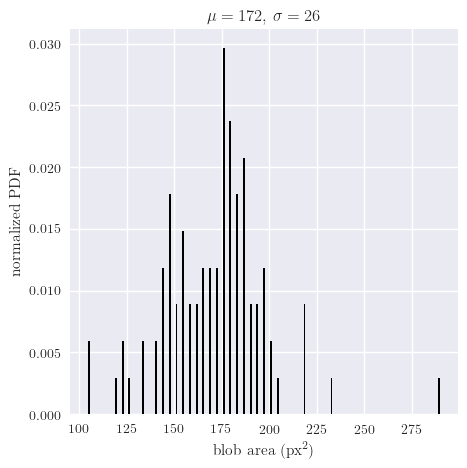

In [542]:
areas = props_df['area'].values.astype(int)
areas_filterbysize = np.array([a for i, a in enumerate(areas) if 100 < a < 300])
hist, bin_edges = np.histogram(areas_filterbysize, 
                               len(np.unique(areas_filterbysize)),
                               density=True)
plt.bar(bin_edges[:-1], hist, width=1.0, color='k')
plt.xlabel('blob area (px$^2$)')
plt.ylabel('normalized PDF')
plt.title('$\mu = %i$, $\sigma = %i$'%(areas_filterbysize.mean(), areas_filterbysize.std()))
plt.savefig('area_hist.png', dpi=300, bbox_inches='tight')
plt.show()

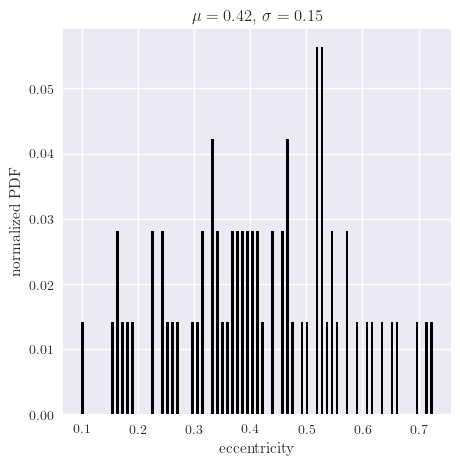

In [544]:
eccs = props_df['eccentricity'].values.astype(float)
eccs_filterbysize = np.array([e for e, a in zip(eccs, areas) if 172-26 < a < 172+26])
hist, bin_edges = np.histogram(eccs_filterbysize, 
                               len(np.unique(eccs_filterbysize)))
hist = hist/eccs_filterbysize.size
plt.bar(bin_edges[:-1], hist, width=0.005, color='k')
plt.xlabel('eccentricity')
plt.ylabel('normalized PDF')
plt.title('$\mu = %.2f$, $\sigma = %.2f$'%(eccs_filterbysize.mean(), eccs_filterbysize.std()))
plt.savefig('ecc_hist.png', dpi=300, bbox_inches='tight')
plt.show()

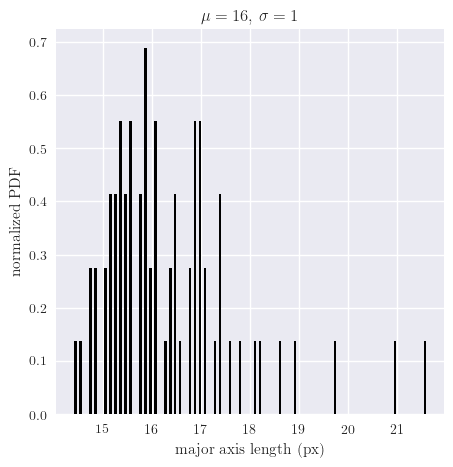

In [545]:
majax = props_df['major_axis_length'].values.astype(float)
majax_filterbysize = np.array([m for m, a in zip(majax, areas) if 172-26 < a < 172+26])
hist, bin_edges = np.histogram(majax_filterbysize, 
                               len(np.unique(majax_filterbysize)),
                               density=True)
plt.bar(bin_edges[:-1], hist, width=0.05, color='k')
plt.xlabel('major axis length (px)')
plt.ylabel('normalized PDF')
plt.title('$\mu = %i$, $\sigma = %i$'%(majax_filterbysize.mean(), majax_filterbysize.std()))
plt.savefig('majax_hist.png', dpi=300, bbox_inches='tight')
plt.show()

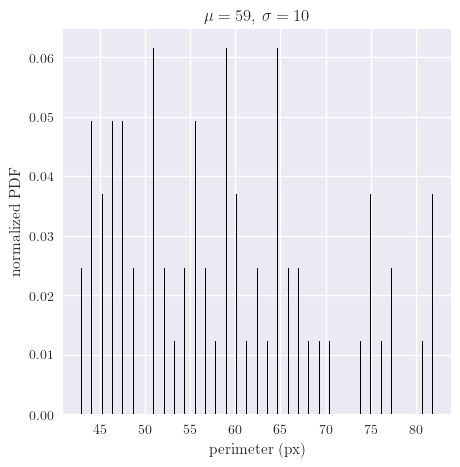

In [550]:
per = props_df['perimeter'].values.astype(int)
per_filterbysize = np.array([p for p, a in zip(per, areas) if 172-26 < a < 172+26])
hist, bin_edges = np.histogram(per_filterbysize, 
                               len(np.unique(per_filterbysize)),
                               density=True)
plt.bar(bin_edges[:-1], hist, width=0.1, color='k')
plt.xlabel('perimeter (px)')
plt.ylabel('normalized PDF')
plt.title('$\mu = %i$, $\sigma = %i$'%(per_filterbysize.mean(), per_filterbysize.std()))
plt.savefig('per_hist.png', dpi=300, bbox_inches='tight')
plt.show()